# Algorithms in graphics
## Lab 3

[[0, 0, 0, 1, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1]]


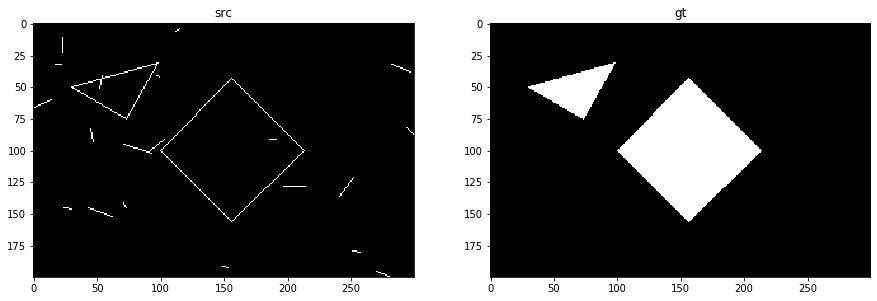

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

directory = "LabCV/"
f_in_lines = open(os.path.join(directory, "001_line_in.txt"), "r")
image_src = plt.imread(os.path.join(directory, "001_line_src.png"))
image_gt = plt.imread(os.path.join(directory, "001_line_gt.png"))

f, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].set_title("src")
ax[1].set_title("gt")
ax[0].imshow(image_src, cmap='gray')
ax[1].imshow(image_gt, cmap='gray')

N = int(f_in_lines.readline())
basis_figures = []
for i in range(N):
    new_figure = [int(number) for number in f_in_lines.readline().split(',')]
    basis_figures.append(new_figure)
    
print(basis_figures)

In [25]:
def find_figures(N, basis_figures, src_image):
    """ 
    Finds basis_figures at src_image.
    
    Parameters
    ----------
    N : number of basis figures
    basis_figures: basis in format (p1.x, p1.y, p2.x, p2.y, ..., pk.x, pk.y)
    src_image: source image
    
    Returns
    ----------
    list found_figures of M items. Each item is a tuple (basis figure id, shift X, shift Y, scale, rotation_angle)

    """
    
    ## TODO some SOLVER instead of reading correct answer
    found_figures = []
    
    # reading correct answer
    f_out_lines = open(os.path.join(directory, "001_line_out.txt"), "r")
    M = int(f_out_lines.readline())

    for i in range(M):
        new_figure = [int(number) for number in f_out_lines.readline().split(', ')]
        found_figures.append(new_figure)
    
    return M, found_figures

In [26]:
M, found_figures = find_figures(N, basis_figures, image_src)
print(M)
print(found_figures)

2
[[0, 80, -45, 100, 100], [1, 50, -60, 30, 50]]


In [27]:
class Transformation:
    def __init__(self, scale, angle, dx, dy):
        self.scale = scale
        self.angle = angle
        self.dx = dx
        self.dy = dy
        
def draw(inpt, gt, shape, transform, color=255):
    assert (inpt.shape == gt.shape)

    new_shape = shape.copy().astype(np.float)
    
    print(transform.scale, transform.angle)
    # Scale
    new_shape *= transform.scale

    # Rotation
    tmp = new_shape.copy()
    
    for i in [0, 1]:
        new_shape[:, i] = np.cos(transform.angle) * tmp[:, i] \
                         - ((-1)** i) * np.sin(transform.angle) * tmp[:, 1 - i]

    #Shift
    new_shape[:, 0] += transform.dx
    new_shape[:, 1] += transform.dy

    cv2.fillPoly(gt, [new_shape.astype(np.int32)], color)
    cv2.polylines(inpt, [new_shape.astype(np.int32)], True, color)
    
def plot_results(found_figures, basis_figures, image_src, image_gt):
    original_src = image_src.copy() 
    original_gt = image_gt.copy() 

    for figure in found_figures:
        basis_figure_id = figure[0]
        scale = figure[1]
        rotation_angle = figure[2] / 180 * np.pi

        shift_X = figure[3]
        shift_Y = figure[4]
        
        basis_figure = basis_figures[basis_figure_id]
        basis_points = []
        N = len(basis_figure)
        for i in range(0, N, 2):
            basis_points.append((basis_figure[i], basis_figure[i+1]))
            
        transform = Transformation(scale, rotation_angle, shift_X, shift_Y)
        
        draw(image_src, 
             image_gt,
             np.array(basis_points, dtype=np.int32), 
             transform)
        
    f, ax = plt.subplots(1, 4, figsize=(15,15))
    ax[0].set_title("src result")
    ax[1].set_title("gt result")
    ax[2].set_title("src original")
    ax[3].set_title("gt original")
    ax[0].imshow(image_src, cmap='gray')
    ax[1].imshow(image_gt, cmap='gray')
    ax[2].imshow(original_src, cmap='gray')
    ax[3].imshow(original_gt, cmap='gray')


80 -0.7853981633974483
50 -1.0471975511965976


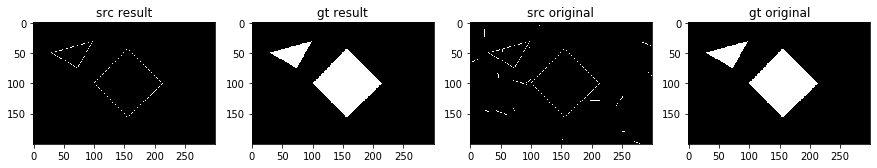

In [28]:
plot_results(found_figures, basis_figures, image_src, image_gt)
plt.show()